<img style="float: right;" src="fig/unifor.jpg" width="250px">

# Introdução ao Aprendizado de Máquina
Prof. Erneson A. Oliveira<br>
MBA em Ciência de Dados<br>
Universidade de Fortaleza

# Lista de afazeres

1. Olhar o quadro geral;

2. Obter os dados;

3. Descobrir e visualizar os dados para obter informações;

4. Preparar os dados para os algoritmos do AM;

5. Selecionar e treinar um modelo;

6. Ajustar o seu modelo;

7. Apresentar sua solução;

8. Lançar, monitorar e manter seu SAM.

# 1. Olhar o quadro geral

## 1.1 Qual o objetivo?

## 1.2 Qual é a solução atual?

## 1.3 Como modelar o SAM?

## 1.4 Como escolher a medida de desempenho?

### 1.4.1 Raiz do erro quadrático médio ou <i>Root Mean Squared Error</i> (RMSE):

O RMSE pode ser definido pela seguinte expressão:

\begin{equation}\nonumber
    \text{RMSE}(\mathbf{X},h)=\sqrt{\frac{1}{m}\sum_{i=1}^m [y^{(i)}-\hat{y}^{(i)}]^2},
\end{equation}

onde
\begin{equation}\nonumber
    \mathbf{x}^{(i)}=
    \begin{bmatrix}
        1\\
        x^{(i)}_1\\
        x^{(i)}_2\\
        \vdots\\
        x^{(i)}_n
    \end{bmatrix}
    \text{,} \quad
    \mathbf{X}=
    \begin{bmatrix}
        (\mathbf{x}^{(1)})^T\\
        (\mathbf{x}^{(2)})^T\\
        \vdots\\
        (\mathbf{x}^{(m)})^T
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & x^{(1)}_1 & x^{(1)}_2 & \dots  & x^{(1)}_n\\
        1 & x^{(2)}_1 & x^{(2)}_2 & \dots  & x^{(2)}_n\\
        \vdots & \vdots    & \vdots    & \ddots & \vdots\\
        1 & x^{(m)}_1 & x^{(m)}_2 & \dots  & x^{(m)}_n\\
    \end{bmatrix}
    \quad \text{e} \quad
    \hat{y}^{(i)}=h(\mathbf{x}^{(i)}).
\end{equation}

Alternativamente, usando o formalismo matricial, o RMSE também pode ser expresso como:

\begin{equation}\nonumber
    \text{RMSE}(\mathbf{X},h)=\sqrt{\frac{1}{m}\mathbf{e}^T\mathbf{e}},
\end{equation}

onde

\begin{equation}\nonumber
    \mathbf{y}=
    \begin{bmatrix}
        y^{(1)}\\
        y^{(2)}\\
        \vdots\\
        y^{(m)}
    \end{bmatrix}
    \text{,} \quad
    \hat{\mathbf{y}}=
    \begin{bmatrix}
        \hat{y}^{(1)}\\
        \hat{y}^{(2)}\\
        \vdots\\
        \hat{y}^{(m)}
    \end{bmatrix}
    =
    \begin{bmatrix}
        h(\mathbf{x}^{(1)})\\
        h(\mathbf{x}^{(2)})\\
        \vdots\\
        h(\mathbf{x}^{(m)})
    \end{bmatrix}
    \quad \text{e} \quad
    \mathbf{e}=\mathbf{y}-\hat{\mathbf{y}}.
\end{equation}

Aqui:

- $m$ é o número de instâncias;<br>
- $n$ é o número de características de cada instância;<br>
- $\mathbf{x}^{(i)}$ é o vetor de características da $i$-ésima instância;<br>
- $\mathbf{X}$ é a matriz que contêm todas as características de todas as instâncias;<br>
- $y^{(i)}$ é o rótulo da $i$-ésima instância;<br>
- $\mathbf{y}$ é o vetor de rótulos;<br>
- $h$ é a função predição (Hipótese);<br>
- $\hat{y}^{(i)}$ é a previsão da $i$-ésima instância;<br>
- $\hat{\mathbf{y}}$ é o vetor de previsão;<br>
- $\mathbf{e}$ é o erro da previsão;<br>
- RMSE é uma medida de desempenho, isto é, é a função de custo medida no conjunto de exemplos $(\mathbf{X},\mathbf{y})$ utilizando a hipótese $h$.

# 2. Obter os dados

## 2.1 Base de dados

In [1]:
import pandas as pd

df = pd.read_csv('datasets/housing.csv',sep=';',encoding='utf-8') # Open CSV file

In [2]:
df.head() # preview

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info() # Some general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df["ocean_proximity"].value_counts() # It identifies all categories in "ocean_proximity"

OCEAN         9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe() # It describies all numerical values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


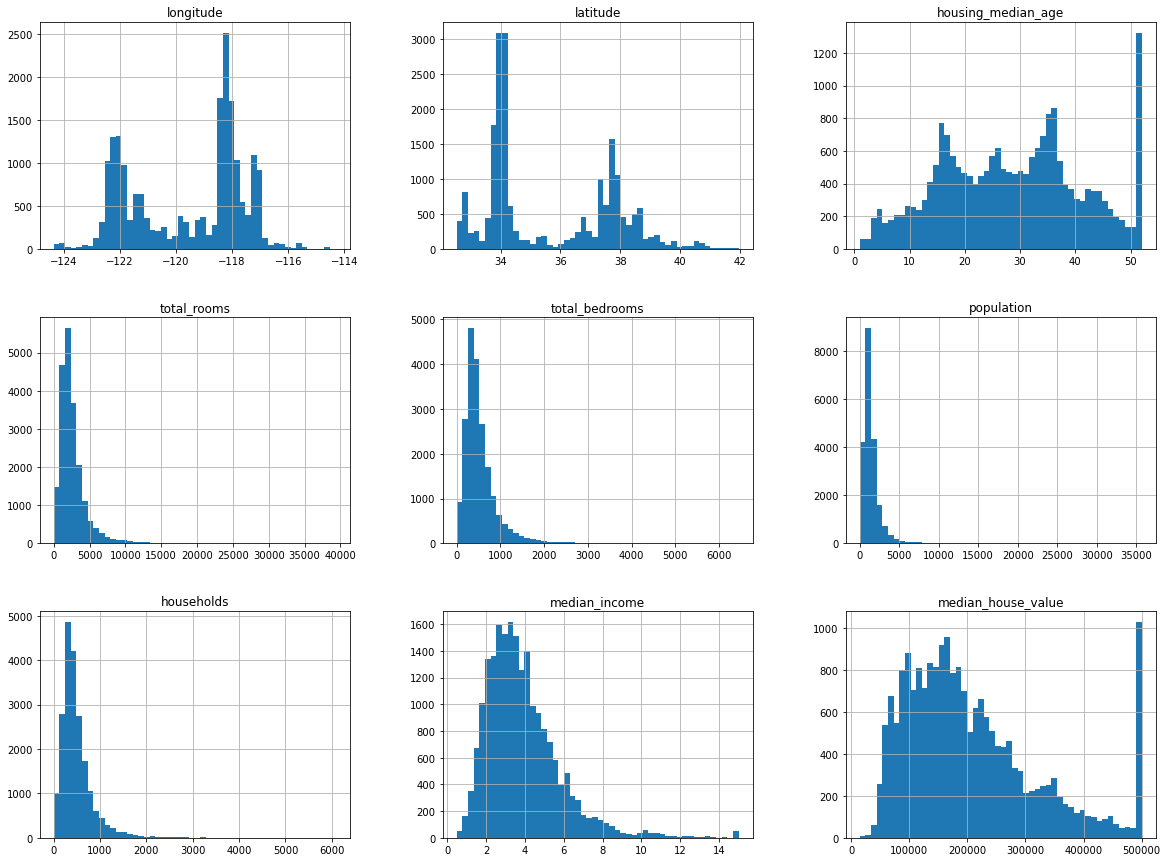

In [6]:
g = df.hist(bins=50, figsize=(20,15)) # Histograms

## 2.2 Conjunto de treinamento e conjunto de teste

<img src="fig/set1.jpg" width="900px">

### 2.2.1 Amostragem aleatória

In [7]:
from sklearn.model_selection import train_test_split

test_size = 0.2 # Test set size: 20%
random_state = 42 # Random seed

train_set,test_set = train_test_split(df,
                                      test_size=test_size,
                                      random_state=random_state) # Use if data is large enough

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


### 2.2.2 Amostragem estratificada

In [11]:
import numpy as np

# Creating a categorical attribute from a continous numeric attribute
df['income_cat'] = np.ceil(df['median_income']/1.5) # Limiting the number of categories
df['income_cat'].where(df['income_cat']<5,5.0,inplace=True) # defining discrete categories

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [13]:
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

test_size = 0.2 # Test set size: 20%
random_state = 42 # Random seed
strat_train_set,strat_test_set = train_test_split(df,
                                                  test_size=test_size,
                                                  random_state=random_state,
                                                  stratify=df['income_cat']) # Use if data is not large enough

In [15]:
# income category proportions in the overall dataset (S)
S_overall = df['income_cat'].value_counts()/len(df)
S_overall.rename('income_cat_overall',inplace=True)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat_overall, dtype: float64

In [16]:
### random sampling with income_cat ###
from sklearn.model_selection import train_test_split # Use if data is large enough

test_size = 0.2 # Test set size: 20%
random_state = 42 # Random seed

train_set_with_income_cat,test_set_with_income_cat= train_test_split(df,
                                                                     test_size=test_size,
                                                                     random_state=random_state)
### random sampling with income_cat ###

# income category proportions in the test set generated using random sampling
S_random = test_set_with_income_cat['income_cat'].value_counts()/len(test_set_with_income_cat)
S_random.rename('income_cat_random',inplace=True)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat_random, dtype: float64

In [17]:
# income category proportions in the test set generated using stratified sampling
S_stratified = strat_test_set['income_cat'].value_counts()/len(strat_test_set)
S_stratified.rename('income_cat_stratified',inplace=True)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat_stratified, dtype: float64

In [18]:
# Comparison among proportions
pd.concat([S_overall,S_random,S_stratified],axis=1).sort_index()

,income_cat_overall,income_cat_random,income_cat_stratified
1.0,0.039826,0.040213,0.039971
2.0,0.318847,0.324370,0.318798
3.0,0.350581,0.358527,0.350533
4.0,0.176308,0.167393,0.176357
5.0,0.114438,0.109496,0.114341


In [19]:
# removing the income_cat attribute
strat_train_set = strat_train_set.drop('income_cat',axis=1)
strat_test_set = strat_test_set.drop('income_cat',axis=1)

# 3. Descobrir e visualizar os dados para obter informações

## 3.1 Explorando o conjunto de treinamento

### 3.1.1 Visualizando dados geográficos

In [20]:
housing = strat_train_set.copy() # train_set.copy()
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None


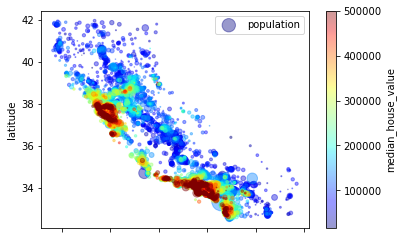

In [21]:
import matplotlib.pyplot as plt

sorted_housing = housing.sort_values(by='median_house_value')

s = sorted_housing['population']/100 # Sizes
l = 'population'              # Label
c = 'median_house_value'      # Label
cm = plt.get_cmap('jet')      # Colormap
cb = True                     # Colorbar

# Scatterplot with sorted values, colormap and transparency
g = sorted_housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=s,label=l,c=c,cmap=cm,colorbar=cb)
l = plt.legend()

### 3.1.2 Buscando correlações

Coeficiente de correlação padrão ou coeficiente de Pearson ($r$):

<img src="fig/pearson.jpg" width="600px">

In [22]:
corr_matrix = housing.corr()

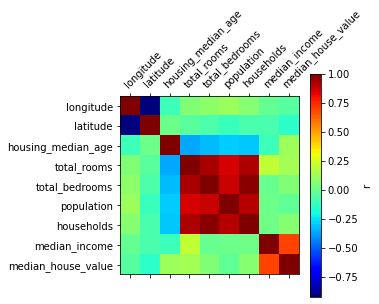

In [23]:
columns = list(corr_matrix.columns)

cm = plt.get_cmap('jet') # viridis,inferno,plasma

g = plt.matshow(corr_matrix,cmap=cm)

cbar = plt.colorbar()
cbar.ax.set_ylabel('r')

ax = plt.gca() # get the current axes
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment
r = plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

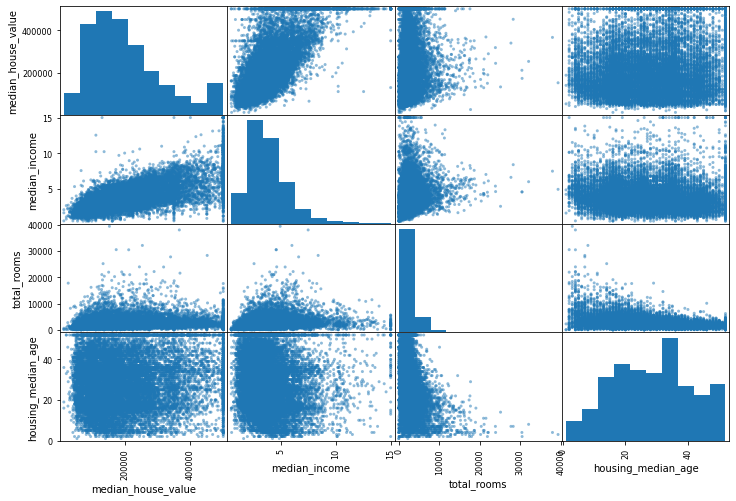

In [25]:
from pandas.plotting import scatter_matrix

# only promising attributes
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
g = scatter_matrix(housing[attributes],figsize=(12,8))

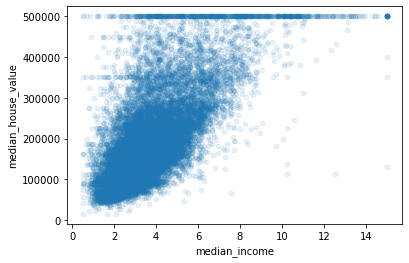

In [26]:
# The most promising attribute
g = housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

### 3.1.3 Experimentando com combinações de atributos

In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] # cômodos por domicílio
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] # quartos por cômodo
housing['population_per_household'] = housing['population']/housing['households'] # população por domicílio

In [28]:
corr_matrix = housing.corr()

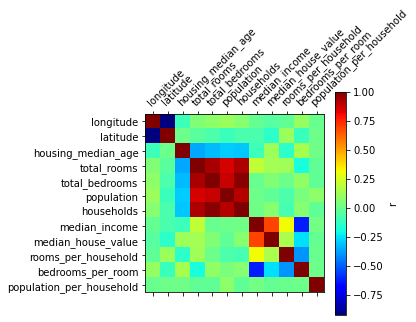

In [29]:
columns = list(corr_matrix.columns)

cm = plt.get_cmap('jet') # viridis,inferno,plasma

g = plt.matshow(corr_matrix,cmap=cm)

cbar = plt.colorbar()
cbar.ax.set_ylabel('r')

ax = plt.gca() # get the current axes
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment
r = plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 4. Preparar o dado para modelos de AM

## 4.1 Limpando os dados

In [31]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_labels = strat_train_set['median_house_value'].copy() # y

In [32]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### 4.1.1 Tratando os valores faltantes

In [34]:
# Option 1
housing.dropna(subset=['total_bedrooms'],inplace=True) # Get rid of the correspoding districts
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [35]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's

# Option 2
housing.drop('total_bedrooms',axis=1,inplace=True) # Get rid of the whole attribute
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [36]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's

# Option 3
mean = housing['total_bedrooms'].mean() # Save the value for the test set
housing['total_bedrooms'].fillna(mean,inplace=True) # Set the values to zero, the mean, the median, etc.

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [37]:
print(mean)

534.9146386205209


### 4.1.2 Tratando os valores faltantes com o SciKit-Learn

Interface dos objetos do SciKit-Learn:

- Consistência: Todos os objetos compartilham a mesma interface.
    - Estimadores: Qualquer objeto que possa estimar algum parâmetro a partir de um conjunto de dados (`.fit()`);
    - Transformadores: Estimadores que também podem transformar um conjunto de dados (`.transform()` e `.fit_transform()`);
    - Previsores: Estimadores que também podem fazer previsões a partir de um conjunto de dados (`.predict()`).
- Inspeção: Todos os hiperparâmetros de um estimador são acessíveis por `.get_params`, bem como os parâmetros aprendidos por ele, `.statistics_`. Para um previsor, a qualidade das previsões pode ser acessada por `.score()`;
- Não proliferação de classes: Os dados são representados por arrays do Numpy ou matrizes esparsas do SciPy. Além disso, os hiperparâmetros são variáveis de normais do Python;
- Composição: Os blocos de construção permitem a construção de uma "linha de produção";
- Padrões sensíveis: Valores padrões razoáveis para todos os parâmetros.

In [39]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_num = housing.drop('ocean_proximity',axis=1) # numerical columns only

# Option 4
from sklearn.impute import SimpleImputer # Estimator

imputer = SimpleImputer(strategy='mean') # object of the class Imputer

# Imputer is a "Estimator": input data -> estimated parameter
imputer.fit(housing_num)

#print(imputer.statistics_) # Mean of each column of housing_num
#print(housing_num.mean().values)

# Imputer is also a "Transformer": estimated parameters + input data -> transformed data
X = imputer.transform(housing_num)

# input data -> estimated parameters; estimated parameters + input data -> transformed data
#X = imputer.fit_transform(housing_num)

housing_num_transformed = pd.DataFrame(X,columns=housing_num.columns) #from ndarray to DataFrame

housing_num_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


## 4.2 Manipulando texto e atributos categóricos

In [40]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_cat = housing['ocean_proximity'] # Categorical attributes only
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496         OCEAN
1481       NEAR BAY
18125         OCEAN
5830          OCEAN
17989         OCEAN
4861          OCEAN
Name: ocean_proximity, dtype: object

### 4.2.1 Tratando valores categóricos com o Pandas

In [41]:
housing_cat_encoded,housing_cat_decoded = housing_cat.factorize(sort=True)
print(housing_cat_encoded[:10])
print(housing_cat_decoded)

[0 3 0 3 4 2 4 4 4 4]
Index(['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'OCEAN'], dtype='object')


### 4.2.2 Tratando valores categóricos com o SciKit-Learn

#### 4.2.2.1 LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder # Estimator and Transformer

encoder = LabelEncoder()

housing_cat_encoded = encoder.fit_transform(housing_cat)

print(housing_cat_encoded[:10])
print(encoder.classes_)

[0 3 0 3 4 2 4 4 4 4]
['INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN' 'OCEAN']


#### 4.2.2.2 OneHotEncoder

In [48]:
from sklearn.preprocessing import OneHotEncoder # Estimator and Transformer

# 1D array to 2D array: "One shape dimension can be -1. In this case, the 
# value is inferred from the length of the array and remaining dimensions."
housing_cat_reshaped = housing_cat.to_numpy().reshape(-1,1)
print(housing_cat_reshaped)

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_reshaped) # The output is a SciPy sparse matrix

#print(housing_cat_1hot)
print(housing_cat_1hot.toarray()) # From SciPy sparse matrix to Numpy (dense) matrix

[['INLAND']
 ['NEAR OCEAN']
 ['INLAND']
 ...
 ['OCEAN']
 ['OCEAN']
 ['INLAND']]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


## 4.3 Personalize transformadores

In [49]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's

### 4.3.1 Classes em Python

Classe é uma descrição que abstrai um conjunto de objetos com características similares.

<img src="fig/class.png" width="600px">

In [53]:
class dog:
    def __init__(self,nome,peso):
        self.nome = nome # Attribute
        self.peso = peso # Attribute
    def eat(self,comida): # method
        self.peso = self.peso+comida

meu_cachorro = dog('Luke',5)
print(meu_cachorro.nome, meu_cachorro.peso)

meu_cachorro.eat(2)
print(meu_cachorro.nome, meu_cachorro.peso)

teu_cachorro = dog('Einstein',10)
print(teu_cachorro.nome, teu_cachorro.peso)
teu_cachorro.eat(4)
print(teu_cachorro.nome, teu_cachorro.peso)

Luke 5
Luke 7
Einstein 10
Einstein 14


### 4.3.2 Experimentando com combinações de atributos (3.1.3) usando o SciKit-Learn

In [54]:
from sklearn.base import BaseEstimator,TransformerMixin

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self,X,y=None):
        return self # Nothing else to do
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,3]/X[:,6]
        population_per_household = X[:,5]/X[:,6]
        bedrooms_per_room = X[:,4]/X[:,3]
        
        return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]

adder = CombinedAttributesAdder()
housing_extra_attribs = adder.transform(housing.values)
print(housing_extra_attribs)

[[-121.46 38.52 29.0 ... 5.485835694050992 3.168555240793201
  0.20578363026077975]
 [-117.23 33.09 7.0 ... 6.927083333333333 2.6236979166666665
  0.16071428571428573]
 [-119.04 35.37 44.0 ... 5.3933333333333335 2.223333333333333
  0.1915945611866502]
 ...
 [-122.72 38.44 48.0 ... 4.1104651162790695 2.6627906976744184
  0.2347949080622348]
 [-122.7 38.31 14.0 ... 6.297405189620759 2.411177644710579
  0.1838351822503962]
 [-122.14 39.97 27.0 ... 5.477157360406092 3.1725888324873095
  0.2057460611677479]]


## 4.4 Escalonamento das características

In [55]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_num = housing.drop('ocean_proximity',axis=1) # numerical columns only

In [57]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### 4.4.1 Normalização

In [56]:
from sklearn.preprocessing import MinMaxScaler # Estimator and Transformer

scaler = MinMaxScaler() # feature_range=(0,1)
housing_num_normalized = scaler.fit_transform(housing_num) # normalized

housing_num_normalized

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.06261386, 0.13144137,
        0.11542599],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.05639172, 0.14301718,
        0.40257376],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.01861039, 0.05563854,
        0.16379774],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.0127526 , 0.0317401 ,
        0.18481124],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.03377337, 0.09316654,
        0.25492752],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.01743322, 0.03640777,
        0.18151474]])

### 4.4.2 Padronização

In [58]:
from sklearn.preprocessing import StandardScaler # Good for outliers, bad for Neural networks

scaler = StandardScaler()
housing_num_standardized = scaler.fit_transform(housing_num)

housing_num_standardized

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

## 4.5 Pipelines de Transformação

<img src="fig/pipeline.jpg" width="600px">

In [59]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_num = housing.drop('ocean_proximity',axis=1) # numerical columns only
housing_cat = housing['ocean_proximity'] # Categorical attributes only

### 4.5.1 Pipeline para atributos numéricos

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('scaler', StandardScaler())])

housing_num_transformed = num_pipeline.fit_transform(housing_num)

housing_num_transformed

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

### 4.5.2 Pipeline para atributos categóricos

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder #Transformer

housing_cat_reshaped = housing_cat.values.reshape(-1,1)

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                         ('cat_encoder', OneHotEncoder(sparse=False))])
housing_cat_transformed = cat_pipeline.fit_transform(housing_cat_reshaped)

housing_cat_transformed

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

### 4.5.3 Pipeline para atributos numéricos e categóricos

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self,X,y=None):
        return self # Nothing else to do
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,3]/X[:,6]
        population_per_household = X[:,5]/X[:,6]
        bedrooms_per_room = X[:,4]/X[:,3]
        
        return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs=['longitude',
             'latitude',
             'housing_median_age',
             'total_rooms',
             'total_bedrooms',
             'population',
             'households',
             'median_income']

cat_attribs=["ocean_proximity"]

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="mean")),
                         ('adder', CombinedAttributesAdder()),
                         ('scaler', StandardScaler())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                         ('encoder', OneHotEncoder(sparse=False))])

full_pipeline = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, num_attribs),
                                                ('cat_pipeline', cat_pipeline, cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
housing_prepared

(16512, 16)


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# 5. Selecione e treine um modelo de AM

## 5.1 Treinando e avaliando o conjunto de treinamento

### 5.1.1 Modelo de Regressão Linear

Em um modelo linear, o valor alvo é dado por uma combinação linear dos atributos. Matematicamente,

\begin{equation}\nonumber
\hat{y}=h_{\boldsymbol{\theta}}(\mathbf{x})=\boldsymbol{\theta}^T \mathbf{x} = \theta_0+\theta_1 x_1+\dots+\theta_n x_n,
\end{equation}

onde,

\begin{equation}\nonumber
    \mathbf{x}=
    \begin{bmatrix}
        1\\
        x_1\\
        \vdots\\
        x_n
    \end{bmatrix}
    \quad \text{e} \quad
    \boldsymbol{\theta}=
    \begin{bmatrix}
        \theta_0\\
        \theta_1\\
        \vdots\\
        \theta_n
    \end{bmatrix}.
\end{equation}

O valor de $\theta$ que minimiza o método dos mínimos quadrados é dado por:

\begin{equation}\nonumber
\hat{\boldsymbol{\theta}}=(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y},
\end{equation}

onde,

\begin{equation}\nonumber
    \hat{\boldsymbol{\theta}}=
    \begin{bmatrix}
        \hat{\theta}_0\\
        \hat{\theta}_1\\
        \vdots\\
        \hat{\theta}_n
    \end{bmatrix}
\end{equation}.


Aqui:

- $\mathbf{x}$ é o vetor de características;<br>
- $\boldsymbol{\theta}$ é o vetor dos parâmetros do modelo;<br>
- $\boldsymbol{\hat{\theta}}$ é o vetor das estimativas dos parâmetros ajustados do modelo (`intercept_` e `coef_`).

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels) # X without 1's,y

print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [64]:
some_data = housing.iloc[:5]
some_data_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

some_data_predicted = lin_reg.predict(some_data_prepared)

print(some_data_labels) # y
print(some_data_predicted) # y_hat

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64
[ 85968. 304848. 153184. 185264. 245184.]


In [65]:
from sklearn.metrics import mean_squared_error

housing_predicted = lin_reg.predict(housing_prepared)
lin_reg_rmse = np.sqrt(mean_squared_error(housing_labels,housing_predicted)) # y,y_hat

print(lin_reg_rmse) # Underfitting

68728.85670547685


### 5.1.2 Árvore de Decisão

In [66]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()

dec_tree_reg.fit(housing_prepared,housing_labels) # X without 1's,y

print(dec_tree_reg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [67]:
from sklearn.metrics import mean_squared_error

housing_predicted=dec_tree_reg.predict(housing_prepared)
dec_tree_rmse=np.sqrt(mean_squared_error(housing_labels,housing_predicted))

print(dec_tree_rmse) # Overfitting

0.0


### 5.1.3 Floresta Aleatória

In [68]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg = RandomForestRegressor()

rand_forest_reg.fit(housing_prepared,housing_labels)

print(rand_forest_reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [69]:
from sklearn.metrics import mean_squared_error

housing_predicted=rand_forest_reg.predict(housing_prepared)
rand_forest_reg_rmse=np.sqrt(mean_squared_error(housing_labels,housing_predicted))

print(rand_forest_reg_rmse) # Overfitting?

18820.9149488646


### 5.2 Avaliando melhor com a utilização da Validação Cruzada

### 5.2.1 Conjunto de validação

<img src="fig/set2.jpg" width="900px">

In [70]:
from sklearn.model_selection import train_test_split

test_size=0.2 # Test set size: 20%
random_state=42 # Random seed
strat_train_set0,strat_test_set0=train_test_split(df,
                                                  test_size=test_size,
                                                  random_state=random_state,
                                                  stratify=df['income_cat'])

valid_size=0.25 # Validation set size: 25% of 80% -> 20% of 100%
random_state=24 # Random seed
strat_train_set0,strat_valid_set0=train_test_split(strat_train_set0,
                                                   test_size=valid_size,
                                                   random_state=random_state,
                                                   stratify=strat_train_set0['income_cat'])

strat_train_set0=strat_train_set0.drop('income_cat',axis=1)
strat_valid_set0=strat_valid_set0.drop('income_cat',axis=1)
strat_test_set0=strat_test_set0.drop('income_cat',axis=1)

print(strat_train_set0.info())
print(strat_valid_set0.info())
print(strat_test_set0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 8141 to 7538
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12384 non-null  float64
 1   latitude            12384 non-null  float64
 2   housing_median_age  12384 non-null  float64
 3   total_rooms         12384 non-null  float64
 4   total_bedrooms      12269 non-null  float64
 5   population          12384 non-null  float64
 6   households          12384 non-null  float64
 7   median_income       12384 non-null  float64
 8   median_house_value  12384 non-null  float64
 9   ocean_proximity     12384 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 19521 to 17224
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-

In [71]:
housing0 = strat_train_set0.drop('median_house_value',axis=1) # X without 1's
housing0_labels = strat_train_set0['median_house_value'].copy() # y

housing0_prepared = full_pipeline.transform(housing0)

In [72]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(housing0_prepared,housing0_labels)

print(dec_tree_reg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [74]:
housing0 = strat_valid_set0.drop('median_house_value',axis=1) # X without 1's
housing0_labels = strat_valid_set0['median_house_value'].copy() # y

housing0_prepared = full_pipeline.transform(housing0)

housing0_predicted = dec_tree_reg.predict(housing0_prepared)
dec_tree_rmse = np.sqrt(mean_squared_error(housing0_labels,housing0_predicted))

print(dec_tree_rmse) # Decision Tree is overfitting so badly that it performs worse than the lin_reg_rmse!

74564.41852829467


### 5.2.2 Validação cruzada (k-fold)

<img src="fig/set3.jpg" width="900px">

In [75]:
housing = strat_train_set.drop('median_house_value',axis=1) # X without 1's
housing_labels = strat_train_set['median_house_value'].copy() # y

housing_prepared = full_pipeline.transform(housing)

#### 5.2.2.1 Regressão Linear

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
scores=cross_val_score(lin_reg,
                       housing_prepared,
                       housing_labels,
                       scoring='neg_mean_squared_error', # cross_val_score expects a utility function
                       cv=4)

lin_reg_rmse_score=np.sqrt(-scores) # cross_val_score expects a utility function

print(lin_reg_rmse_score)
print(lin_reg_rmse_score.mean())
print(lin_reg_rmse_score.std())

[2.02792367e+15 6.72006322e+04 7.26143520e+04 6.86901944e+04]
506980917069765.8
878116706712317.4


#### 5.2.2.1 Árvore de Decisão

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dec_tree_reg = DecisionTreeRegressor()

scores=cross_val_score(dec_tree_reg,
                       housing_prepared,
                       housing_labels,
                       scoring='neg_mean_squared_error',
                       cv=4)

dec_tree_reg_rmse_score=np.sqrt(-scores)

print(dec_tree_reg_rmse_score)
print(dec_tree_reg_rmse_score.mean())
print(dec_tree_reg_rmse_score.std())

[70478.87404886 73413.66262899 74819.39194547 73341.78881195]
73013.42935881826
1577.456662211567


#### 5.2.2.3 Floresta Aleatória

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rand_forest_reg=RandomForestRegressor()

scores=cross_val_score(rand_forest_reg,
                       housing_prepared,
                       housing_labels,
                       scoring='neg_mean_squared_error',
                       cv=4)

rand_forest_reg_rmse_score=np.sqrt(-scores)

print(rand_forest_reg_rmse_score)
print(rand_forest_reg_rmse_score.mean())
print(rand_forest_reg_rmse_score.std()) # Much better, but it is still Overfitting

[49914.4114763  50401.56597269 52386.92979561 51792.43709619]
51123.83608519696
1003.3462803571201


# 6. Ajuste seu modelo

## 6.1 Grid Search

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rand_forest_reg = RandomForestRegressor()

param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]}, # 3x4=12
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}] # 1x2x3=6

grid_search = GridSearchCV(rand_forest_reg,
                           param_grid,
                           scoring='neg_mean_squared_error',
                           refit=True,
                           cv=5, #5
                           return_train_score=True) # 12+6=18

grid_search.fit(housing_prepared,housing_labels) #18*5=90 rounds of training!

print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


In [80]:
rand_forest_reg=grid_search.best_estimator_ # Best trained model in the whole training set

print(rand_forest_reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [81]:
d=grid_search.cv_results_

for mean_train_score,mean_test_score,params in zip(d['mean_train_score'],d['mean_test_score'],d['params']):
    print(np.sqrt(-mean_train_score),np.sqrt(-mean_test_score),params)

32760.63612545353 63510.309290650315 {'max_features': 2, 'n_estimators': 3}
24264.31976482034 55457.42474341596 {'max_features': 2, 'n_estimators': 10}
20848.357862249217 52808.51034301858 {'max_features': 2, 'n_estimators': 30}
31066.765537414933 60669.07080089904 {'max_features': 4, 'n_estimators': 3}
22822.07528665876 52817.01616356129 {'max_features': 4, 'n_estimators': 10}
19877.089247472315 50382.97146943269 {'max_features': 4, 'n_estimators': 30}
30451.892209342084 59593.31501655067 {'max_features': 6, 'n_estimators': 3}
22423.487437869822 52108.76940215425 {'max_features': 6, 'n_estimators': 10}
19671.003597065646 50186.30298931433 {'max_features': 6, 'n_estimators': 30}
29974.61584160629 58376.016381711976 {'max_features': 8, 'n_estimators': 3}
22307.218404892235 52056.148697576624 {'max_features': 8, 'n_estimators': 10}
19464.438613446953 49871.96896083997 {'max_features': 8, 'n_estimators': 30}
6.23643283111915 62347.17059664576 {'bootstrap': False, 'max_features': 2, 'n_est

## 6.2 Randomized Search

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rand_forest_reg=RandomForestRegressor()

param_grid=[{'n_estimators': np.arange(100), 'max_features': np.arange(1,10)}, # 100x9=900
            {'bootstrap':[False],'n_estimators': np.arange(50), 'max_features':np.arange(1,10)}] # 1x50x9=450

randomized_search=RandomizedSearchCV(rand_forest_reg,
                         param_grid,
                         n_iter=10, # Number of iterations
                         scoring='neg_mean_squared_error',
                         refit=True,
                         cv=10, #10
                         random_state=42, # Seed
                         return_train_score=True) # 900+450=1350

randomized_search.fit(housing_prepared,housing_labels) #1350*10=13500 rounds of training!

print(randomized_search.best_params_)

In [ ]:
rand_forest_reg=randomized_search.best_estimator_ # Best trained model in the whole training set

print(rand_forest_reg.get_params())
#print(rand_forest_reg.feature_importances_)

In [ ]:
d=randomized_search.cv_results_

for mean_train_score,mean_test_score,params in zip(d['mean_train_score'],d['mean_test_score'],d['params']):
    print(np.sqrt(-mean_train_score),np.sqrt(-mean_test_score),params)

# 6.3 Analise o seu SAM no conjunto de teste

In [ ]:
from sklearn.metrics import mean_squared_error

housing=strat_test_set.drop('median_house_value',axis=1) # X without 1's
housing_labels=strat_test_set['median_house_value'].copy() # y

housing_prepared=full_pipeline.transform(housing)

rand_forest_reg=randomized_search.best_estimator_ # Best trained model in the whole training set

housing_predicted=rand_forest_reg.predict(housing_prepared)
rand_forest_reg_rmse=np.sqrt(mean_squared_error(housing_labels,housing_predicted))

print(rand_forest_reg_rmse) # Overfitting?

# 7. Apresentar a sua solução

# 8. Lançar, monitorar e manter o SAM